In [138]:
# Used for interacting with the operating system, such as handling file paths.
import os 

# A powerful library for numerical and matrix operations, commonly used in scientific computing and data analysis.
import numpy as np  

# Enables the creation of data visualizations and plots for better data understanding.
import matplotlib.pyplot as plt  

# Provides additional plotting functionalities and a more aesthetically pleasing style, built on top of matplotlib.
import seaborn as sns  

# Offers a fast and extensible progress bar for tracking the progress of loops and iterable objects.
from tqdm import trange  

# breaks text into individual words or sentences.
import nltk
from nltk.tokenize import word_tokenize

# this module provides a list of common stop words used for text analysis and processing.
from nltk.corpus import stopwords  

# converting words to their base or root form.
from nltk.stem import WordNetLemmatizer  

# used for calculating the frequency distribution of words in a text.
from nltk.probability import FreqDist  

# A built-in Python module used for counting elements in an iterable.
from collections import Counter 

 # A module from scikit-learn used for text vectorization, converting text data into numerical features.
from sklearn.feature_extraction.text import CountVectorizer 

# A popular library for data manipulation and analysis, particularly useful for working with structured data like spreadsheets or tables.
import pandas as pd  


import warnings
warnings.filterwarnings("ignore", category=UserWarning, message="Glyph 65018")

#to use Arabic date time
import locale
from datetime import datetime
import calendar

import re

In [139]:
files=os.listdir('D:\\UPWork\\WideBot\\Data')

In [140]:
files

['stories_art-et-culture.csv',
 'stories_economie.csv',
 'stories_faits-divers.csv',
 'stories_marocains-du-monde.csv',
 'stories_medias.csv',
 'stories_orbites.csv',
 'stories_politique.csv',
 'stories_regions.csv',
 'stories_societe.csv',
 'stories_sport.csv',
 'stories_tamazight.csv']

In [166]:
df=pd.DataFrame()
for file in files:
    df=pd.concat([df,pd.read_csv('D:\\UPWork\\WideBot\\Data'+'\\'+file)])

In [167]:
df.head()

,Unnamed: 0,id,title,date,author,story,topic
0,0,f06aa998054e11eba66e646e69d991ea,"""بيت الشعر"" يسائل وزير الثقافة عن كوابيس سوداء",الجمعة 02 أكتوبر 2020 - 23:19,هسبريس من الرباط,"وجه ""بيت الشعر في المغرب"" إلى وزير الثقافة وال...",art-et-culture
1,1,f1cf1b9c054e11ebb718646e69d991ea,"مهرجان ""سينما المؤلّف"" يستحضر روح ثريا جبران",الجمعة 02 أكتوبر 2020 - 07:26,هسبريس من الرباط,في ظلّ استمرار حالة الطوارئ الصحية المرتبطة بج...,art-et-culture
2,2,f2d282a4054e11eb800f646e69d991ea,"فيلم ""بدون عنف"" لهشام العسري ..""كعب الحذاء ووا...",الجمعة 02 أكتوبر 2020 - 04:00,عفيفة الحسينات*,تشير مشاهدة فيلم قصير ضمن الثلاثية الأخيرة للم...,art-et-culture
3,3,f3f46cac054e11eba403646e69d991ea,"""تنين ووهان"" .. مريم أيت أحمد توقِّع أولى ""روا...",الجمعة 02 أكتوبر 2020 - 02:00,حاورَها: وائل بورشاشن,"مِن قَلب أيّام ""الحَجْر""، رأتِ النّورَ الفصول ...",art-et-culture
4,4,f50f0476054e11eba31b646e69d991ea,"مسكر يتخلّى عن دعم ""الوزارة"" بسبب ""الجمهور""",الخميس 01 أكتوبر 2020 - 19:40,هسبريس من الرباط,أعلن الفنان المغربيّ سعيد مسكر تخليه عن مبلغ ا...,art-et-culture


In [168]:
df.drop(['id','Unnamed: 0'],inplace=True,axis=1)

In [169]:
df.head()

,title,date,author,story,topic
0,"""بيت الشعر"" يسائل وزير الثقافة عن كوابيس سوداء",الجمعة 02 أكتوبر 2020 - 23:19,هسبريس من الرباط,"وجه ""بيت الشعر في المغرب"" إلى وزير الثقافة وال...",art-et-culture
1,"مهرجان ""سينما المؤلّف"" يستحضر روح ثريا جبران",الجمعة 02 أكتوبر 2020 - 07:26,هسبريس من الرباط,في ظلّ استمرار حالة الطوارئ الصحية المرتبطة بج...,art-et-culture
2,"فيلم ""بدون عنف"" لهشام العسري ..""كعب الحذاء ووا...",الجمعة 02 أكتوبر 2020 - 04:00,عفيفة الحسينات*,تشير مشاهدة فيلم قصير ضمن الثلاثية الأخيرة للم...,art-et-culture
3,"""تنين ووهان"" .. مريم أيت أحمد توقِّع أولى ""روا...",الجمعة 02 أكتوبر 2020 - 02:00,حاورَها: وائل بورشاشن,"مِن قَلب أيّام ""الحَجْر""، رأتِ النّورَ الفصول ...",art-et-culture
4,"مسكر يتخلّى عن دعم ""الوزارة"" بسبب ""الجمهور""",الخميس 01 أكتوبر 2020 - 19:40,هسبريس من الرباط,أعلن الفنان المغربيّ سعيد مسكر تخليه عن مبلغ ا...,art-et-culture


## Text Normalization

In [170]:
# After some search the pyarabic lib offerrs  usesful functions that specialized on arabic language so i rather use it that the 
# regular libs used in english
# pip install pyarabic

In [171]:
from pyarabic.araby import strip_tashkeel, strip_tatweel
from pyarabic.araby import normalize_ligature, normalize_hamza

In [172]:
def normalize_arabic_text(text):
    # Remove diacritics (Tashkeel)
    text = strip_tashkeel(text)
    
    # Remove Tatweel (elongation character)
    text = strip_tatweel(text)
    
    # Normalize Arabic ligatures (join separate characters)
    text = normalize_ligature(text)
    
    # Normalize Hamza (handle different forms of hamza)
    text = normalize_hamza(text)
    
    return text

In [173]:
#This just to make sure all characters appears in the same in all the text
df['story']=df['story'].apply(normalize_arabic_text)
df['title']=df['title'].apply(normalize_arabic_text)
df['author']=df['author'].apply(normalize_arabic_text)

## Remove Diacritics

In [174]:
# Removing the Diacritics will help the complexity as the text is some how too long
def remove_diacritics(text):
    # Regular expression pattern to match Arabic diacritics (Tashkeel)
    diacritics_pattern = re.compile("[\u0617-\u061A\u064B-\u0652]")
    
    # Replace diacritics with an empty string
    cleaned_text = diacritics_pattern.sub("", text)
    
    return cleaned_text

In [175]:
df['story']=df['story'].apply(remove_diacritics)
df['title']=df['title'].apply(remove_diacritics)
df['author']=df['author'].apply(remove_diacritics)

## Stepwords Removal


In [151]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zacks\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zacks\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [152]:
def remove_arabic_stop_words(text):
    # Tokenize the text into individual words
    words = word_tokenize(text)
    
    # Get the list of Arabic stop words from the nltk library
    arabic_stop_words = set(stopwords.words('arabic'))
    
    # Remove stop words from the list of words
    filtered_words = [word for word in words if word not in arabic_stop_words]
    
    # Join the filtered words back into a single text string
    cleaned_text = ' '.join(filtered_words)
    
    return cleaned_text



In [176]:
df['story']=df['story'].apply(remove_arabic_stop_words)
df['title']=df['title'].apply(remove_arabic_stop_words)
df['author']=df['author'].apply(remove_arabic_stop_words)

In [177]:
df.head()

,title,date,author,story,topic
0,`` بيت الشعر '' يساءل وزير الثقافة كوابيس سوداء,الجمعة 02 أكتوبر 2020 - 23:19,هسبريس الرباط,وجه `` بيت الشعر المغرب '' ءلى وزير الثقافة وا...,art-et-culture
1,مهرجان `` سينما المءلف '' يستحضر روح ثريا جبران,الجمعة 02 أكتوبر 2020 - 07:26,هسبريس الرباط,ظل استمرار حالة الطوارء الصحية المرتبطة بجاءحة...,art-et-culture
2,فيلم `` بدون عنف '' لهشام العسري .. '' كعب الح...,الجمعة 02 أكتوبر 2020 - 04:00,عفيفة الحسينات *,تشير مشاهدة فيلم قصير ضمن الثلاثية الءخيرة للم...,art-et-culture
3,`` تنين ووهان '' .. مريم ءيت ءحمد توقع ءولى ``...,الجمعة 02 أكتوبر 2020 - 02:00,حاورها : واءل بورشاشن,قلب ءيام `` الحجر '' ، رءت النور الفصول الءولى...,art-et-culture
4,مسكر يتخلى دعم `` الوزارة '' بسبب `` الجمهور '',الخميس 01 أكتوبر 2020 - 19:40,هسبريس الرباط,ءعلن الفنان المغربي سعيد مسكر تخليه مبلغ الدعم...,art-et-culture


## Splitting the data

In [178]:
Topics=list(df['topic'].unique())
Topics


['art-et-culture',
 'economie',
 'faits-divers',
 'marocains-du-monde',
 'medias',
 'orbites',
 'politique',
 'regions',
 'societe',
 'sport',
 'tamazight']

In [192]:
#Hashing Tpics into numbers
t= dict(zip(Topics,range(0,11)))
t.values()
rt=dict(zip(list(t.values()),list(t.keys())))
rt

{0: 'art-et-culture',
 1: 'economie',
 2: 'faits-divers',
 3: 'marocains-du-monde',
 4: 'medias',
 5: 'orbites',
 6: 'politique',
 7: 'regions',
 8: 'societe',
 9: 'sport',
 10: 'tamazight'}

In [180]:
def hashTopic(x):
    return t[x]

df['topic']=df['topic'].apply(hashTopic)

In [181]:
df.head()

,title,date,author,story,topic
0,`` بيت الشعر '' يساءل وزير الثقافة كوابيس سوداء,الجمعة 02 أكتوبر 2020 - 23:19,هسبريس الرباط,وجه `` بيت الشعر المغرب '' ءلى وزير الثقافة وا...,0
1,مهرجان `` سينما المءلف '' يستحضر روح ثريا جبران,الجمعة 02 أكتوبر 2020 - 07:26,هسبريس الرباط,ظل استمرار حالة الطوارء الصحية المرتبطة بجاءحة...,0
2,فيلم `` بدون عنف '' لهشام العسري .. '' كعب الح...,الجمعة 02 أكتوبر 2020 - 04:00,عفيفة الحسينات *,تشير مشاهدة فيلم قصير ضمن الثلاثية الءخيرة للم...,0
3,`` تنين ووهان '' .. مريم ءيت ءحمد توقع ءولى ``...,الجمعة 02 أكتوبر 2020 - 02:00,حاورها : واءل بورشاشن,قلب ءيام `` الحجر '' ، رءت النور الفصول الءولى...,0
4,مسكر يتخلى دعم `` الوزارة '' بسبب `` الجمهور '',الخميس 01 أكتوبر 2020 - 19:40,هسبريس الرباط,ءعلن الفنان المغربي سعيد مسكر تخليه مبلغ الدعم...,0


## Modeling

In [182]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score

df['combined_text'] = df['title'] + ' ' + df['story']+' '+df['author']

df = df.sample(frac=1, random_state=42)

X = df['combined_text'].values
y = df['topic'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

xgb_classifier = xgb.XGBClassifier(n_estimators=100, max_depth=3, num_class=11, objective='multi:softmax')
xgb_classifier.fit(X_train_tfidf, y_train)

y_pred = xgb_classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8395454545454546


In [201]:
from sklearn.metrics import classification_report

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       200
           1       0.79      0.80      0.79       200
           2       0.93      0.89      0.91       200
           3       0.83      0.86      0.84       200
           4       0.92      0.92      0.92       200
           5       0.69      0.66      0.67       200
           6       0.73      0.78      0.75       200
           7       0.79      0.80      0.80       200
           8       0.72      0.73      0.73       200
           9       0.97      0.97      0.97       200
          10       0.97      0.98      0.98       200

    accuracy                           0.84      2200
   macro avg       0.84      0.84      0.84      2200
weighted avg       0.84      0.84      0.84      2200



In [200]:
report.

'              precision    recall  f1-score   support\n\n           0       0.89      0.85      0.87       200\n           1       0.79      0.80      0.79       200\n           2       0.93      0.89      0.91       200\n           3       0.83      0.86      0.84       200\n           4       0.92      0.92      0.92       200\n           5       0.69      0.66      0.67       200\n           6       0.73      0.78      0.75       200\n           7       0.79      0.80      0.80       200\n           8       0.72      0.73      0.73       200\n           9       0.97      0.97      0.97       200\n          10       0.97      0.98      0.98       200\n\n    accuracy                           0.84      2200\n   macro avg       0.84      0.84      0.84      2200\nweighted avg       0.84      0.84      0.84      2200\n'

## Classification Report

The classification report shows the performance of our model in classifying data into 11 different classes (0 to 10). It provides several metrics to evaluate how well the model is doing.

#### Precision:
Precision tells us how many of the predicted instances for each class are actually correct. A higher precision means fewer instances were wrongly predicted.

#### Recall:
Recall tells us how many of the actual instances for each class the model can identify correctly. A higher recall means the model can identify most of the actual instances for that class.

#### F1-score:
F1-score is a balanced measure that considers both precision and recall. It is useful when we want to look at the overall performance, considering both false positives and false negatives.

#### Support:
Support represents the number of instances in each class in the test set.

Now, let's interpret the results:

- **Class 0**:
   - Precision: 0.89
   - Recall: 0.85
   - F1-score: 0.87

- **Class 1**:
   - Precision: 0.79
   - Recall: 0.80
   - F1-score: 0.79

- **Class 2**:
   - Precision: 0.93
   - Recall: 0.89
   - F1-score: 0.91

- **Class 3**:
   - Precision: 0.83
   - Recall: 0.86
   - F1-score: 0.84

- **Class 4**:
   - Precision: 0.92
   - Recall: 0.92
   - F1-score: 0.92

- **Class 5**:
   - Precision: 0.69
   - Recall: 0.66
   - F1-score: 0.67

- **Class 6**:
   - Precision: 0.73
   - Recall: 0.78
   - F1-score: 0.75

- **Class 7**:
   - Precision: 0.79
   - Recall: 0.80
   - F1-score: 0.80

- **Class 8**:
   - Precision: 0.72
   - Recall: 0.73
   - F1-score: 0.73

- **Class 9**:
   - Precision: 0.97
   - Recall: 0.97
   - F1-score: 0.97

- **Class 10**:
   - Precision: 0.97
   - Recall: 0.98
   - F1-score: 0.98

Overall, the model seems to be performing quite well, with balanced precision and recall for most of the classes, resulting in an accuracy of 84%. However, as with any model, it's essential to consider the specific requirements of the application and further investigate areas that may need improvement.


In [162]:
from sklearn.metrics import confusion_matrix

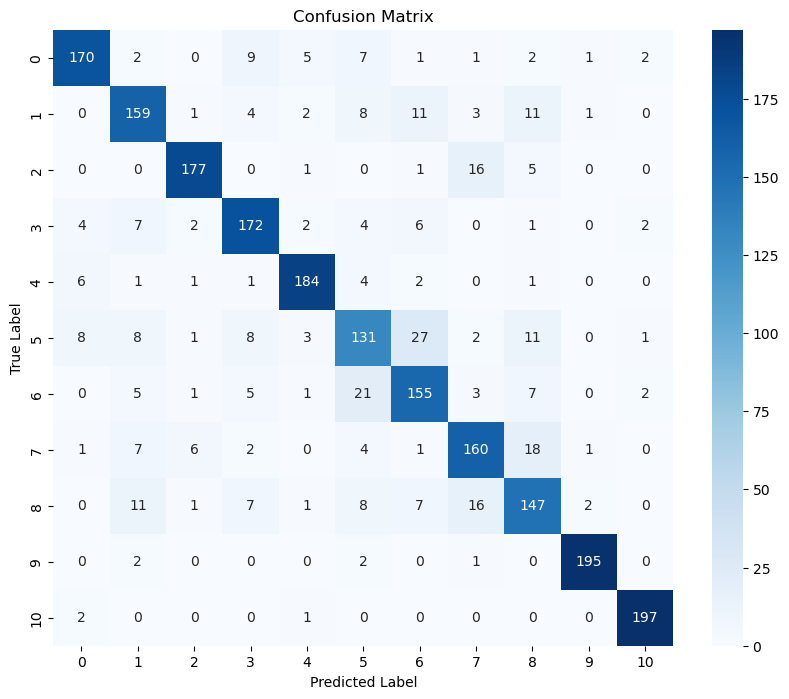

In [184]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix
conf_df = pd.DataFrame(conf_matrix, index=range(11), columns=range(11))

# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()